In [55]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from proj1_helpers import *
from implementations import *
from helpers import *
from data_manager import *
from runners import *
from plot import *

In [57]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

### Test consol

runing with two types of parameter...
runing degree 1
runing degree 2
runing degree 3
runing degree 4
runing degree 5
runing degree 6
runing degree 7
runing degree 8
runing degree 9
Score: % 72.546808030679
Score: % 81.3670200766975
Score: % 81.23167155425219
Score: % 84.07399052560342
Score: % 84.27701330927138
Score: % 84.57026844123618
Score: % 84.52515226708776
Score: % 84.79584931197834


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Score: % 84.81840739905256


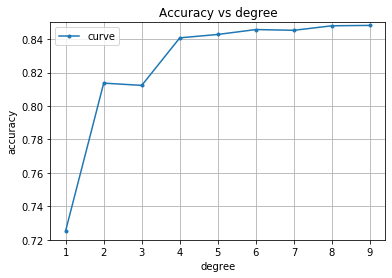

In [54]:
# Data processing -> part you can play with
My_options = ['nanmed', 'bound', 'zerovar']

# If you use jets
jets_y, jets_tX, _ = cat_variables(y, tX, ids)
y, tX = jets_y[3], jets_tX[3]

#Split (split=True) or cross (split=False)
split = True
ratio = 0.8
seed = 1


# Parameters -> part you can play with
# Every parameter needs to be in a list (if np.array write inside brackets por favor)
degrees = [range(1, 10)]
gammas = []
lambdas = [[1.1253355826007645e-10]]
method = ridge_regression

# Gradient parameters, indicate if you are using a gradient method (True/False)
Grad_method = False
max_iter = 1000
w_init = []

'''Everything above can be modified'''
#************************************************************************************************
'''Everything under should not be modified'''

y, tX = process_data(y, tX, My_options)
y_tr, x_tr, y_te, x_te = split_data(y, tX, ratio, seed)
grad = [Grad_method, w_init, max_iter]

# Run-run-run
if split:
    weights, losses = optimization(y_tr, x_tr, method, degrees, gammas, lambdas, grad)
else:
    weights, losses = optimization_cross(y, tX, method, degrees, gammas, lambdas, grad)

    

# Plot-plot-plot

logistic = False 

if 'prb' in My_options:
    logistic = True
    
if len(weights) == 1:
    if len(degrees[0]) == 1:
        x_te = build_poly(x_te, degrees[0][0])
    test_score(y_te, x_te, weights[0])
elif lambdas :
    if len(lambdas[0]) == 1:
        plot_my_values(weights, y_te, x_te, degrees, gammas, [], logistic)
elif degrees : 
    if len(degrees[0]) == 1:
        x_te = build_poly(x_te, degrees[0][0])
        plot_my_values(weights, y_te, x_te, [], gammas, lambdas, logistic)
else :
    plot_my_values(weights, y_te, x_te, degrees, gammas, lambdas, logistic)

### Main 1

In [30]:
def test_main():
    ''' TEST ALL RAW METHODS '''
    
    # Load train and test data
    DATA_TRAIN_PATH = "../data/train.csv"
    y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
    
    print('Data loaded')
    
    methods = ['least_square_GD', 
               'least_square_SGD', 
               'least_squares', 
               'ridge_regression', 
               'logistic_regression', 
               'reg_logistic_regression']
    
    scores = []
    
    for method in methods:
        scores.append(test(y, tx, method))

    
    index = np.argmax(scores)   
    print('Best method is ', methods[index], ': score = ', scores[index])
    
test_main()

Data loaded
least square GD learning ongoing...
Score: % 70.748
least square SGD learning ongoing...
Score: % 69.452
least square learning ongoing...
Score: % 74.688
ridge learning ongoing...
Score: % 74.688
logistic regression learning ongoing...
Score: % 75.1365
reg logistic regression learning ongoing...
Score: % 75.09
Best method is  logistic_regression : score =  0.751365


### Model selection

In [22]:
# Load train and test data
DATA_TRAIN_PATH = "../data/train.csv"
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
print('Data loaded')

jets_y, jets_tX, _ = cat_variables(y, tx, ids)

for i in range(len(jets_y)):
    
    print('Selection of jet', i)
    
    My_options = ['nanmed', 'bound', 'zerovar']
    y, processed_tx_train = process_data(jets_y[i], jets_tX[i], My_options)
    print('Data processed')

    # Find the optimal parameters for ridge regression
    optimal_degree, optimal_lambda = optimal_hyperparameters(y, processed_tx_train)

Data loaded
Selection of jet 0
Data processed
best for degree  5  lambda: 1e-12 -> RMSE  =  0.680278061886013
best for degree  6  lambda: 1e-12 -> RMSE  =  0.6793823605223961
best for degree  7  lambda: 1e-12 -> RMSE  =  0.6782717805724462
best for degree  8  lambda: 2.571913809059347e-12 -> RMSE  =  0.6780140644580992
Selection of jet 1
Data processed
best for degree  5  lambda: 2.571913809059347e-12 -> RMSE  =  0.7571239649417154
best for degree  6  lambda: 7.443803013251697e-10 -> RMSE  =  0.7517342195221864
best for degree  7  lambda: 7.443803013251697e-10 -> RMSE  =  0.7507742210248669
best for degree  8  lambda: 1e-12 -> RMSE  =  0.7496615590124668
Selection of jet 2
Data processed
best for degree  5  lambda: 1.9144819761699535e-09 -> RMSE  =  0.7106451707154525
best for degree  6  lambda: 1.1253355826007645e-10 -> RMSE  =  0.7057623927378783
best for degree  7  lambda: 1e-12 -> RMSE  =  0.7045770688251414
best for degree  8  lambda: 1e-12 -> RMSE  =  0.7032418141432465
Selection

## accuracy test for the best model : ridge-regression with poly/cross-term/Jet values

In [63]:
def jet_accuracy_test(y, tX, methods, parameters):
    ratio = 0.8
    seed = 1
    
    pred = []
    Y =[]
    
    
    
    jets_y, jets_tX, _ = cat_variables(y, tX, ids)
    
    My_options = ['nanmed', 'bound', 'zerovar']
    
    for ind in range(len(jets_y)):
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        final_tX = np.c_[build_poly(jets_tX[ind],degres[ind]), build_cross_terms(jets_tX[ind])]
     
        
        y_tr, x_tr, y_te, x_te = split_data(jets_y[ind], final_tX, ratio, seed)
       
        
        param = [y_tr, x_tr,gammas[ind]]

        w,loss = test_methods(methods, param)
        
        pred_test = predict(x_te, w)
        print("jet number : ", ind)
        print("validation accuracy : ", np.sum(pred_test==y_te)/pred_test.shape[0])
        
        pred.append(pred_test)
        Y.append(y_te)
    
    pred =np.concatenate(pred, 0)
    Y = np.concatenate(Y,0)
    
    print("total accuracy :", np.sum(pred==Y)/pred.shape[0])
    

gammas = [1e-12,7.443803013251697e-10,1.1253355826007645e-10,1.7012542798525856e-11]
degres = [6,7,6,6]

DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
parameters = gammas
jet_accuracy_test(y, tX, ridge_regression, parameters)



jet number :  0
validation accuracy :  0.8552269429014663
jet number :  1
validation accuracy :  0.8110129602166484
jet number :  2
validation accuracy :  0.8401151250496228
jet number :  3
validation accuracy :  0.8490863974734942
total accuracy : 0.8379232415351693


In [59]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## submission of prediction with the best model : ridge-regresion with poly/cross-term/jet values

In [66]:
def main(y, tX,ids,y_test,tX_test,ids_test, methods, parameters):
    """
    
    
    
    
    """
    
    #load datas 
    DATA_TRAIN_PATH = '../data/train.csv' 
    y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

    DATA_TEST_PATH = '../data/test.csv' 
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

    #best parameters found from learning
    gammas = [1e-12,7.443803013251697e-10,1.1253355826007645e-10,1.7012542798525856e-11]
    degres = [6,7,6,6]
    
    
    pred = []
    id_t =[]
    
    #create jet_num
    jets_y, jets_tX, _ = cat_variables(y, tX, ids)
    jets_y_test, jets_tX_test, id_test = cat_variables(y_test, tX_test, ids_test)
    
    #pre-processing options chosen
        #convert nan values with median
        #
        #
        #
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    #iteration in each jet_num batch
    for ind in range(len(jets_y)):
        print('Analyzing jet {}'.format(ind))
        
        #pre-process data (train and test)
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        jets_y_test[ind], jets_tX_test[ind] = process_data(jets_y_test[ind], jets_tX_test[ind], My_options)

        #construction of the final features containing polynomiale features and cross-terms
        final_tX_train = np.c_[build_poly(jets_tX[ind],degres[ind]), build_cross_terms(jets_tX[ind])]
        final_tX_test = np.c_[build_poly(jets_tX_test[ind],degres[ind]), build_cross_terms(jets_tX_test[ind])]

        #parameters token by the chosen method
        param = [jets_y[ind], final_tX_train, gammas[ind]]
       
        #create weights and losses
        w,loss = test_methods(methods, param)
        
        #creation of predictions
        pred_test = predict(final_tX_test,w)
        
        #lists of prediction and ids for each jet batch
        pred.append(pred_test)
        id_t.append(id_test[ind])


 
    # concatenation lists of ids and predictions for each jet batch in a single well arranged array
    pred =np.concatenate(pred, 0)
    id_t =np.concatenate(id_t,0)


    #submission
    OUTPUT_PATH = "submissionfloflolog.csv"    
    create_csv_submission(id_t, pred, OUTPUT_PATH)
    print('Submission saved as ', OUTPUT_PATH)

    


main(y, tX,ids,y_test,tX_test,ids_test, ridge_regression, parameters)
    

Analyzing jet 0
Analyzing jet 1


KeyboardInterrupt: 